# DSC 530
# Final Project
## Astrid Fuentes
## 06-Mar-2021

In [14]:
# Define the libraries
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

%matplotlib inline

In [2]:
path="/Users/astrid/Documents/GitHub/DSC530/Project"
os.chdir(path)


In [3]:
os.getcwd()

'/Users/astrid/Documents/GitHub/DSC530/Project'

In [4]:
# Read the visit_data csv file using pandas' read_csv function
df = pd.read_csv("day_wise.csv")

In [5]:
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [6]:
# Get column names to be used later
col=df.columns.tolist()
print(col)

['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries']


In [7]:
## Rename columns# Check to see if there are nulls in any record in the data frame
check_nan_in_df = df.isnull().values.any()
print (check_nan_in_df)

False


In [9]:
# To identify duplicates across the whole data set we can use the duplicated() function as follows
check_dups_in_df = df.duplicated().values.any()
print(check_dups_in_df)## Drop columns not needed

False


## Drop columns not needed

In [11]:
# Drop columns we are not interested in
df = df.drop(['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',], axis=1)

In [12]:
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,6
1,2020-01-23,654,18,30,606,99,1,2,8
2,2020-01-24,941,26,36,879,287,8,6,9
3,2020-01-25,1434,42,39,1353,493,16,3,11
4,2020-01-26,2118,56,52,2010,684,14,13,13


## Rename columns

In [25]:
# Rename columns
df= df.rename(columns = {'New cases': 'New_cases','New deaths': 'New_deaths', 'New recovered': 'New_recovered', 
                         'No. of countries': 'Num_countries'}, inplace = False)

Text(0.5, 1.0, 'Histogram of Confirmed Cases')

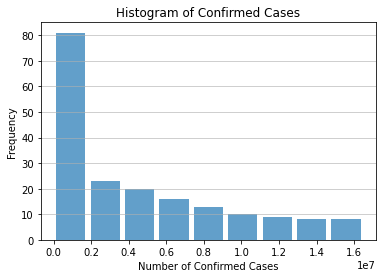

In [37]:
# Histogram of the Confirmed
n, bins, patches = plt.hist(x = df.Confirmed, bins='auto', alpha =0.7, rwidth=0.85)
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Frequency')
plt.title('Histogram of Confirmed Cases')

Text(0.5, 1.0, 'Histogram of New Cases')

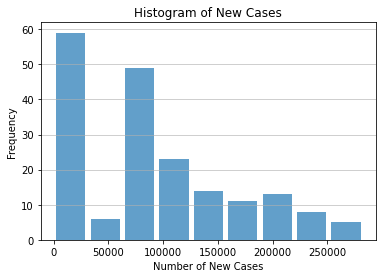

In [32]:
# Histogram of the New Cases
n, bins, patches = plt.hist(x = df.New_cases, bins='auto', alpha =0.7, rwidth=0.85)
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('Number of New Cases')
plt.ylabel('Frequency')
plt.title('Histogram of New Cases')

Text(0.5, 1.0, 'Histogram of New Deaths')

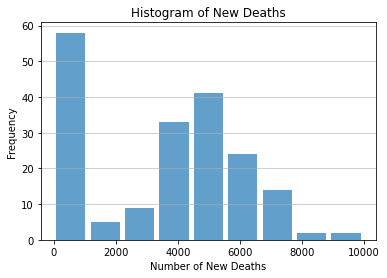

In [33]:
# Histogram of the New Deaths
n, bins, patches = plt.hist(x = df.New_deaths, bins='auto', alpha =0.7, rwidth=0.85)
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('Number of New Deaths')
plt.ylabel('Frequency')
plt.title('Histogram of New Deaths')

Text(0.5, 1.0, 'Histogram of New Recovered')

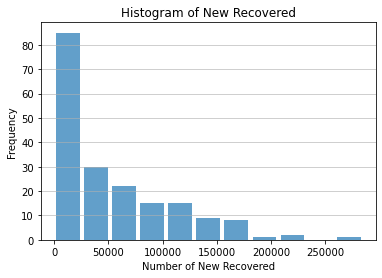

In [34]:
# Histogram of the New Cases
n, bins, patches = plt.hist(x = df.New_recovered, bins='auto', alpha =0.7, rwidth=0.85)
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('Number of New Recovered')
plt.ylabel('Frequency')
plt.title('Histogram of New Recovered')

Text(0.5, 1.0, 'Histogram of Number of Countries')

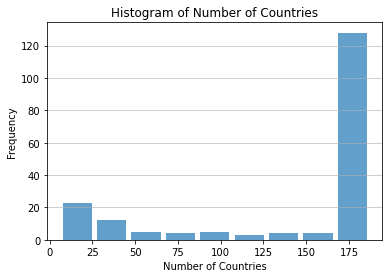

In [36]:
# Histogram of the Number of countries
n, bins, patches = plt.hist(x = df.Num_countries, bins='auto', alpha =0.7, rwidth=0.85)
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('Number of Countries')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Countries')

I do not see outliers in our histograms. It does make sense that after some time, the numbers become larger since some of the variables are acumulating number of patients over time.
If I had to deal with Outliers I would see if it makes sense to drop them from the data set.

In [38]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Num_countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,187.000000


In [96]:
# Use Pmf class from thinkstat2 to build the Probability Mass Function

pmf = thinkstats2.Pmf(df.Num_countries, label='Number of Countries')

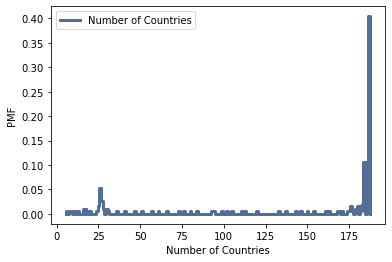

In [97]:
# Use thinkplot.pmf to plot the PMF of Number of Countries

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of Countries', ylabel='PMF')

In [67]:
# Create subsets of data for first and second semesters

df_first_sem = df[df['date'] <'2020-07-01']
df_sec_sem = df[df['Date'] >='2020-07-01']


In [68]:
# Define pmf for the first and second semesters
first_sem_pmf = thinkstats2.Pmf(df_first_sem.Num_countries, label='first semester')
sec_sem_pmf = thinkstats2.Pmf(df_sec_sem.Num_countries, label='second semester')

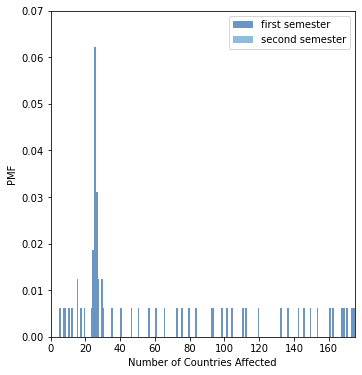

In [77]:
# Plot pmf together
width=1
axis = [0, 175, 0, 0.07]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_sem_pmf, align='right', width=width)
thinkplot.Hist(sec_sem_pmf, align='left', width=width)
thinkplot.Config(xlabel='Number of Countries Affected', ylabel='PMF', axis=axis)

ValueError: zero-size array to reduction operation minimum which has no identity

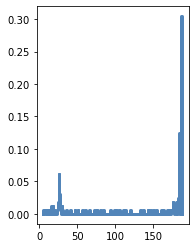

In [74]:
width=0.45
axis = [0, 175, 0, 0.07]
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_sem_pmf, sec_sem_pmf])
thinkplot.Config(xlabel='Number of Countries Affected', axis=axis)

In [82]:
# Use Cdf class from thinkstat2 to build the CDF

cdf = thinkstats2.Cdf(df.Num_countries, label='Num_countries')

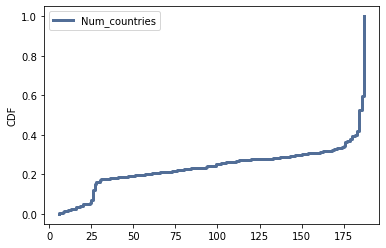

<Figure size 576x432 with 0 Axes>

In [83]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlable='Number of Countries', ylabel='CDF')

In [104]:
# The Normal distribution CDF
import scipy.stats
def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    x = x_range
    y=scipy.stats.norm.cdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

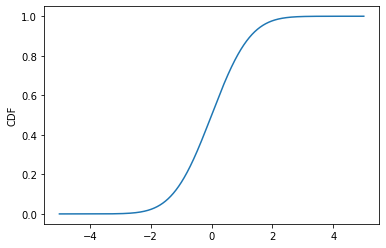

<Figure size 576x432 with 0 Axes>

In [108]:
x = np.linspace(-5,5,5000)
plot_normal(x)
thinkplot.Show(xlable='Normal', ylabel='CDF')

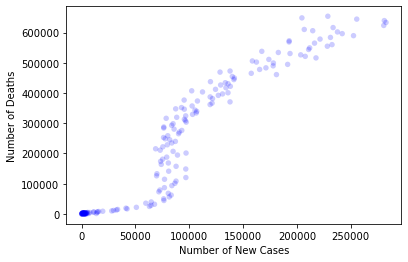

<Figure size 576x432 with 0 Axes>

In [114]:
# Scatter Plots

thinkplot.Scatter(df.New_cases, df.Deaths)
thinkplot.Show(xlabel = 'Number of New Cases', ylabel= 'Number of Deaths')

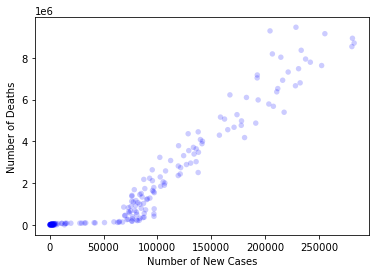

<Figure size 576x432 with 0 Axes>

In [115]:
thinkplot.Scatter(df.New_cases, df.Recovered)
thinkplot.Show(xlabel = 'Number of New Cases', ylabel= 'Number of Recovered')

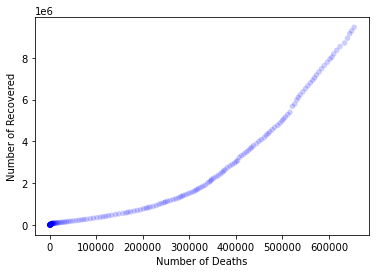

<Figure size 576x432 with 0 Axes>

In [116]:
thinkplot.Scatter(df.Deaths, df.Recovered)
thinkplot.Show(xlabel = 'Number of Deaths', ylabel= 'Number of Recovered')

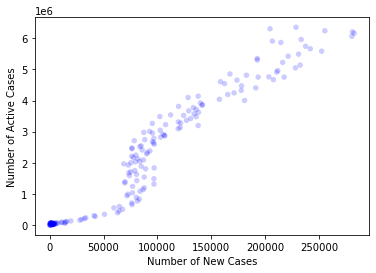

<Figure size 576x432 with 0 Axes>

In [117]:
thinkplot.Scatter(df.New_cases, df.Active)
thinkplot.Show(xlabel = 'Number of New Cases', ylabel= 'Number of Active Cases')

In [121]:
# Covariance
thinkstats2.Cov(df.New_cases, df.Deaths)

15545652249.574245

In [122]:
# Correlation
thinkstats2.Corr(df.New_cases, df.Deaths)

0.9524499171984794

## Permutation test

Previously, we created two groups or subsets of data for first and second semesters

df_first_sem = df[df['date'] <'2020-07-01']

df_sec_sem = df[df['Date'] >='2020-07-01']

Our hypothesis is that the two groups are different meaning that number of New deaths reported is significantly different in the first semester compared to the second semester.

"To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and generate simulated results by shuffling the data."

In [131]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [156]:
# Define our data for the hypotesis test
data = df_first_sem.New_deaths, df_sec_sem.New_deaths

The p-value is 0, which means that the observed difference is not the result of random sampling, but it is generally true in the population.

In [157]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Here's the distrubution of the test statistic (the difference in means) over many simulated samples:

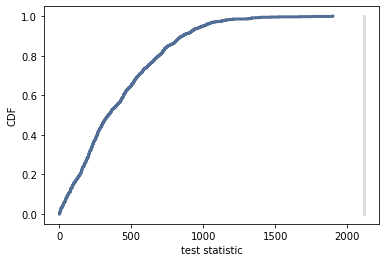

In [158]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

## Regression 

In [129]:
# Regression Model

import statsmodels.formula.api as smf

formula = 'Deaths ~ Active + New_cases'
model = smf.ols(formula, data=df)
results = model.fit()

In [130]:
# Model parameters
results.params

Intercept    3362.425498
Active          0.130616
New_cases      -0.549329
dtype: float64

In [127]:
# Model pvalues
results.pvalues

Intercept     3.222798e-02
Active       6.206917e-129
New_cases     3.184486e-20
dtype: float64

Our regression model is Deaths = 3362.425 + 0.131 Active - 0.549 New_cases
All of our coefficients are significant with very small pvalues as shown above.

In [128]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.342e+04
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          3.40e-223
Time:                        18:54:30   Log-Likelihood:                -2056.6
No. Observations:                 188   AIC:                             4119.
Df Residuals:                     185   BIC:                             4129.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3362.4255   1558.224      2.158      0.0

In the summary above, we can see that R-squared = 0.996 which suggest a good fit for our multiple linear regression model. Our model seems to explain 0.996 of the variability in number of deaths. 